In [225]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import json
import tweepy
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go 
import plotly as py

In [226]:
py.tools.set_credentials_file(username='KDC323', api_key='yz33uA12K8h73ybtBOY7')

In [227]:
hospitalspending_2015 = "Medicare_Hospital_Spending_by_Claim.csv"
hospitalspending_2015_df = pd.read_csv(hospitalspending_2015)
hospitalspending_2015_df

,Hospital_Name,Provider_ID,State,Period,Claim_Type,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Percent_of_Spending_Hospital,Percent_of_Spending_State,Percent_of_Spending_Nation,Start_Date,End_Date
0,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Skilled Nursing Facility,$0,$0,$0,0%,0%,0%,1012015,12312015
1,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Durable Medical Equipment,$18,$31,$24,0.10%,0.16%,0.12%,1012015,12312015
2,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Carrier,"$1,062","$1,480","$1,540",6.01%,7.71%,7.52%,1012015,12312015
3,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Home Health Agency,$917,$948,$816,5.19%,4.94%,3.98%,1012015,12312015
4,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Hospice,$172,$154,$122,0.97%,0.80%,0.60%,1012015,12312015
5,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Inpatient,"$2,518","$2,634","$2,702",14.25%,13.72%,13.18%,1012015,12312015
6,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Outpatient,$473,$596,$730,2.68%,3.10%,3.56%,1012015,12312015
7,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Skilled Nursing Facility,"$3,544","$2,626","$3,319",20.06%,13.67%,16.19%,1012015,12312015
8,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Durable Medical Equipment,$79,$126,$103,0.45%,0.66%,0.50%,1012015,12312015
9,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Carrier,$970,"$1,046","$1,110",5.49%,5.45%,5.42%,1012015,12312015


In [228]:
hospitalspending_state_df = hospitalspending_2015_df[["State","Claim_Type", "Avg_Spending_Per_Episode_State", "Percent_of_Spending_State"]]
hospitalspending_state_df .head()

,State,Claim_Type,Avg_Spending_Per_Episode_State,Percent_of_Spending_State
0,AL,Skilled Nursing Facility,$0,0%
1,AL,Durable Medical Equipment,$31,0.16%
2,AL,Carrier,"$1,480",7.71%
3,AL,Home Health Agency,$948,4.94%
4,AL,Hospice,$154,0.80%


In [229]:
hs_state_totalperhospital= hospitalspending_state_df.loc[hospitalspending_state_df ["Claim_Type"] =="Total", ["State","Claim_Type", "Avg_Spending_Per_Episode_State"]]
hs_state_totalperhospital.head()

,State,Claim_Type,Avg_Spending_Per_Episode_State
10,AL,Total,"$19,201"
32,AL,Total,"$19,201"
54,AL,Total,"$19,201"
79,AL,Total,"$19,201"
101,AL,Total,"$19,201"


In [230]:
hs_state_totalperhospital.index = range(len(hs_state_totalperhospital))
hs_state_totalperhospital.head()

,State,Claim_Type,Avg_Spending_Per_Episode_State
0,AL,Total,"$19,201"
1,AL,Total,"$19,201"
2,AL,Total,"$19,201"
3,AL,Total,"$19,201"
4,AL,Total,"$19,201"


In [231]:
hs_state_totalperhospital["Avg_Spending_Per_Episode_State"] = hs_state_totalperhospital["Avg_Spending_Per_Episode_State"].replace('[\$,]', '', regex=True).astype(float)
hs_state_totalperhospital.head()

,State,Claim_Type,Avg_Spending_Per_Episode_State
0,AL,Total,19201.0
1,AL,Total,19201.0
2,AL,Total,19201.0
3,AL,Total,19201.0
4,AL,Total,19201.0


In [232]:
grouped_hs_state = hs_state_totalperhospital.groupby(['State'])
#print(hs_state_totalperhospital)
grouped_hs_state.count().head()

,Claim_Type,Avg_Spending_Per_Episode_State
State,,
AK,8,8
AL,82,82
AR,43,43
AZ,62,62
CA,288,288


In [233]:
hs_state_mean=grouped_hs_state["Avg_Spending_Per_Episode_State"].mean()
hs_state_mean.head()


State
AK    19907.0
AL    19201.0
AR    19705.0
AZ    20542.0
CA    21141.0
Name: Avg_Spending_Per_Episode_State, dtype: float64

In [234]:
hs_state_mean=hs_state_mean.to_frame()
hs_state_mean.head()
hs_state_mean=hs_state_mean.reset_index()
hs_state_mean.head()

,State,Avg_Spending_Per_Episode_State
0,AK,19907.0
1,AL,19201.0
2,AR,19705.0
3,AZ,20542.0
4,CA,21141.0


In [235]:
hs_state_mean.count()

State                             50
Avg_Spending_Per_Episode_State    50
dtype: int64

In [236]:

hs_state_mean.columns = ['State Abbreviation', 'Avg_Spending_Per_Episode_State']
hs_state_mean.head()

,State Abbreviation,Avg_Spending_Per_Episode_State
0,AK,19907.0
1,AL,19201.0
2,AR,19705.0
3,AZ,20542.0
4,CA,21141.0


In [237]:
affordable_care = "states.csv"

affordable_care_df = pd.read_csv(affordable_care)
affordable_care_df.drop(affordable_care_df.tail(1).index,inplace=True)
affordable_care_df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [238]:

affordable_care_df.count()

State                                           51
Uninsured Rate (2010)                           51
Uninsured Rate (2015)                           51
Uninsured Rate Change (2010-2015)               51
Health Insurance Coverage Change (2010-2015)    51
Employer Health Insurance Coverage (2015)       51
Marketplace Health Insurance Coverage (2016)    51
Marketplace Tax Credits (2016)                  51
Average Monthly Tax Credit (2016)               51
State Medicaid Expansion (2016)                 51
Medicaid Enrollment (2013)                      49
Medicaid Enrollment (2016)                      51
Medicaid Enrollment Change (2013-2016)          49
Medicare Enrollment (2016)                      51
dtype: int64

In [239]:
state_abbreviations = "state_abbreviations (2).csv"

state_abbreviations_df = pd.read_csv(state_abbreviations)
state_abbreviations_df.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [240]:
state_abbreviations_df.count()

State           51
Abbreviation    51
dtype: int64

In [241]:
affordable_care_df['State'] = affordable_care_df['State'].str.strip(' ')

In [242]:
state_abbreviations_df['State'][8]

'District of Columbia'

In [243]:
affordable_care_df['State'][8]

'District of Columbia'

In [244]:
state_abbreviations_df['State'] == affordable_care_df['State']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
Name: State, dtype: bool

In [245]:
affordable_care_statename=pd.merge(affordable_care_df, state_abbreviations_df, left_on='State', right_on='State')
affordable_care_statename.head(9)


,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Abbreviation
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855,AL
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966,AK
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624,AZ
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146,AR
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777,CA
5,Colorado,15.9%,8.1%,-7.8%,419000,2949000,108311,67062,$318,True,783420.0,1375264,591844.0,820234,CO
6,Connecticut,9.1%,6%,-3.1%,110000,2148000,102917,80759,$357,True,NaN,761137,NaN,644136,CT
7,Delaware,9.7%,5.9%,-3.8%,35000,564000,25379,21467,$330,True,223324.0,236702,13378.0,186835,DE
8,District of Columbia,7.6%,3.8%,-3.8%,25000,388000,17666,1224,$183,True,235786.0,255491,19705.0,90492,DC


In [246]:
affordable_care_statename["Average Monthly Tax Credit (2016)"] = affordable_care_statename["Average Monthly Tax Credit (2016)"].replace('[\$,]', '', regex=True).astype(float)
affordable_care_statename["Uninsured Rate (2010)"] = affordable_care_statename["Uninsured Rate (2010)"].replace('[%\,]', '', regex=True).astype(float)
affordable_care_statename["Uninsured Rate (2015)"] = affordable_care_statename["Uninsured Rate (2015)"].replace('[%\,]', '', regex=True).astype(float)
affordable_care_statename["Uninsured Rate Change (2010-2015)"] = affordable_care_statename["Uninsured Rate Change (2010-2015)"].replace('[%\,]', '', regex=True).astype(float)
affordable_care_statename.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Abbreviation
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,False,799176.0,910775,111599.0,989855,AL
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,True,122334.0,166625,44291.0,88966,AK
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,True,1201770.0,1716198,514428.0,1175624,AZ
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,True,556851.0,920194,363343.0,606146,AR
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,True,7755381.0,11843081,4087700.0,5829777,CA


In [247]:
comparestate_affordable_care= affordable_care_statename[['State', 'Abbreviation','Uninsured Rate (2010)','Uninsured Rate (2015)','Uninsured Rate Change (2010-2015)', 'Medicare Enrollment (2016)', "Employer Health Insurance Coverage (2015)","Marketplace Health Insurance Coverage (2016)","Average Monthly Tax Credit (2016)", "Medicaid Enrollment (2016)", "State Medicaid Expansion (2016)"]]


comparestate_affordable_care=comparestate_affordable_care.rename(columns = {'Abbreviation':'State Abbreviation'})
comparestate_affordable_care.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016)
0,Alabama,AL,14.6,10.1,-4.5,989855,2545000,165534,310.0,910775,False
1,Alaska,AK,19.9,14.9,-5.0,88966,390000,17995,750.0,166625,True
2,Arizona,AZ,16.9,10.8,-6.1,1175624,3288000,179445,230.0,1716198,True
3,Arkansas,AR,17.5,9.5,-8.0,606146,1365000,63357,306.0,920194,True
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,True


In [248]:
comparestate_affordable_care = comparestate_affordable_care.drop(comparestate_affordable_care.index[8])
comparestate_affordable_care.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016)
0,Alabama,AL,14.6,10.1,-4.5,989855,2545000,165534,310.0,910775,False
1,Alaska,AK,19.9,14.9,-5.0,88966,390000,17995,750.0,166625,True
2,Arizona,AZ,16.9,10.8,-6.1,1175624,3288000,179445,230.0,1716198,True
3,Arkansas,AR,17.5,9.5,-8.0,606146,1365000,63357,306.0,920194,True
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,True


In [249]:
affordable_care_sort=comparestate_affordable_care.sort_values(['Uninsured Rate Change (2010-2015)'], ascending = True)
affordable_care_sort.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016)
28,Nevada,NV,22.6,12.3,-10.3,471747,1505000,79876,268.0,614298,True
37,Oregon,OR,17.1,7.0,-10.1,784032,2070000,131167,253.0,1021862,True
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,True
17,Kentucky,KY,15.3,6.0,-9.3,881938,2316000,74640,258.0,1220788,True
31,New Mexico,NM,19.6,10.9,-8.7,385918,884000,47497,212.0,766732,True


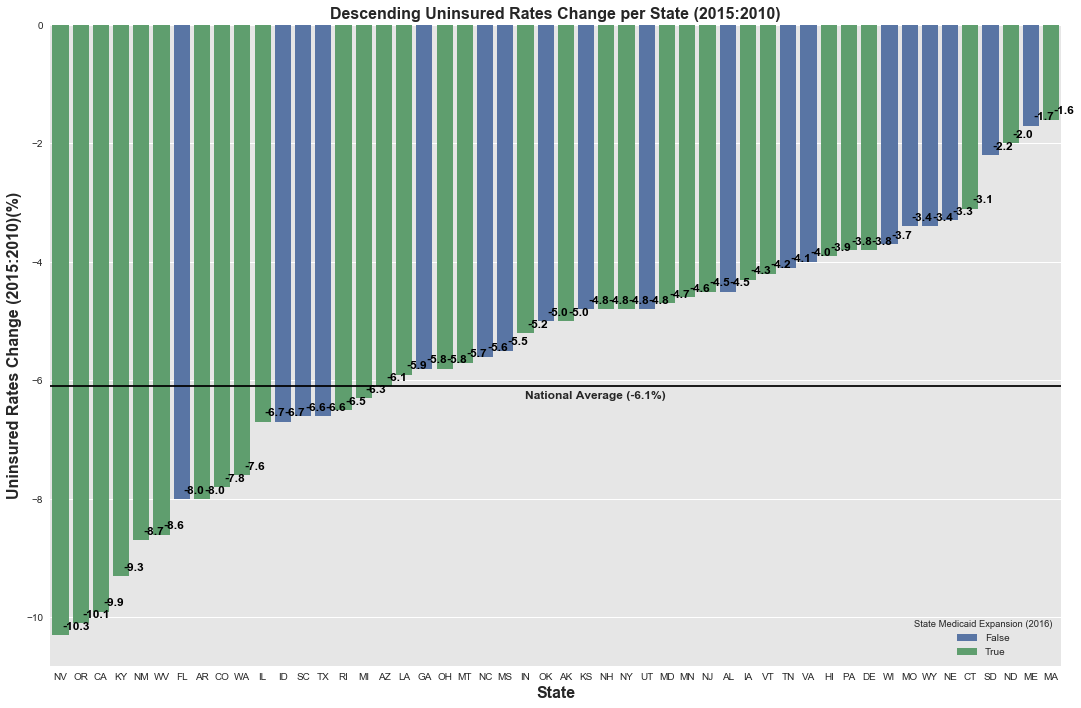

In [250]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10
# plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

g = sns.barplot(x="State Abbreviation", y="Uninsured Rate Change (2010-2015)", hue="State Medicaid Expansion (2016)", orient= 'v',
                 data=affordable_care_sort, dodge=False, ax=ax)
for i, v in enumerate(affordable_care_sort['Uninsured Rate Change (2010-2015)']):
    plt.text(i+.1, v+.1, str(v), color='black', fontweight='bold')

plt.axhline(y=-6.1, color = 'black') #adds a horizontal line for national average
plt.text(23,-6.3,'National Average (-6.1%)',fontweight='bold')    
sns.despine(ax=ax, bottom=True, left=True)
plt.title("Descending Uninsured Rates Change per State (2015:2010)", fontweight='bold',fontsize=16)
plt.xlabel("State", fontweight='bold',fontsize=16)
plt.ylabel("Uninsured Rates Change (2015:2010)(%)",fontweight='bold',fontsize=16)

plt.tight_layout()
plt.savefig("Uninsured Rates Change per State (2010-2015) Descending.png")
plt.show()

In [251]:
Medicaid_Expansion = affordable_care_sort[affordable_care_sort['State Medicaid Expansion (2016)']==True]
Medicaid_Expansion.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016)
28,Nevada,NV,22.6,12.3,-10.3,471747,1505000,79876,268.0,614298,True
37,Oregon,OR,17.1,7.0,-10.1,784032,2070000,131167,253.0,1021862,True
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,True
17,Kentucky,KY,15.3,6.0,-9.3,881938,2316000,74640,258.0,1220788,True
31,New Mexico,NM,19.6,10.9,-8.7,385918,884000,47497,212.0,766732,True


In [252]:
merge_affordable_care_medicare = pd.merge(comparestate_affordable_care, hs_state_mean, how='left', on=['State Abbreviation'])
merge_affordable_care_medicare.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016),Avg_Spending_Per_Episode_State
0,Alabama,AL,14.6,10.1,-4.5,989855,2545000,165534,310.0,910775,False,19201.0
1,Alaska,AK,19.9,14.9,-5.0,88966,390000,17995,750.0,166625,True,19907.0
2,Arizona,AZ,16.9,10.8,-6.1,1175624,3288000,179445,230.0,1716198,True,20542.0
3,Arkansas,AR,17.5,9.5,-8.0,606146,1365000,63357,306.0,920194,True,19705.0
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,True,21141.0


In [253]:
NoMedicaid_Expansion = affordable_care_sort[affordable_care_sort['State Medicaid Expansion (2016)']==False]
NoMedicaid_Expansion.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016)
9,Florida,FL,21.3,13.3,-8.0,4149593,8847000,1531714,305.0,3644673,False
12,Idaho,ID,17.7,11.0,-6.7,294284,836000,94270,265.0,293905,False
40,South Carolina,SC,17.5,10.9,-6.6,974114,2487000,204846,312.0,994804,False
43,Texas,TX,23.7,17.1,-6.6,3765946,13709000,1092650,271.0,4770229,False
10,Georgia,GA,19.7,13.9,-5.8,1574058,5240000,478016,291.0,1782301,False


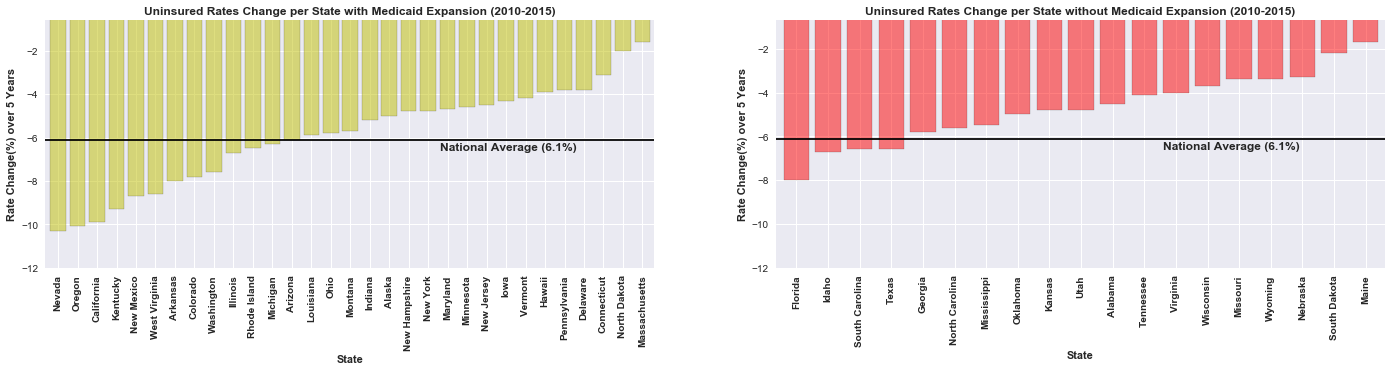

In [254]:
#Combined
sns.set()
x_axis1 = np.arange(len(Medicaid_Expansion))
x_axis = np.arange(len(NoMedicaid_Expansion))
#Plot 1
plt.figure(figsize=(24,10))
plt.subplot(2,2,1)
tick_locations = [value+0.4 for value in x_axis1]
plt.bar(x_axis1, (Medicaid_Expansion['Uninsured Rate Change (2010-2015)']), color='Y', alpha=0.5, align="edge", edgecolor = 'black')
plt.xticks(tick_locations, Medicaid_Expansion["State"], rotation="vertical",fontweight='bold')
plt.xlim(-0.25, len(x_axis1))
plt.ylim(-12, max(Medicaid_Expansion['Uninsured Rate Change (2010-2015)']+1))
plt.axhline(y=-6.1, color = 'black') #adds a horizontal line for national average
plt.text(20,-6.6,'National Average (6.1%)',fontweight='bold')
plt.title("Uninsured Rates Change per State with Medicaid Expansion (2010-2015)", fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.ylabel("Rate Change(%) over 5 Years",fontweight='bold')
#Plot 2 
plt.subplot(222)
plt.bar(x_axis, (NoMedicaid_Expansion['Uninsured Rate Change (2010-2015)']), color='r', alpha=0.5, align="edge", edgecolor = 'black')
plt.xticks(tick_locations, NoMedicaid_Expansion["State"], rotation="vertical",fontweight='bold')
plt.xlim(-0.25, len(x_axis))
plt.ylim(-12, max(NoMedicaid_Expansion['Uninsured Rate Change (2010-2015)']+1))
plt.axhline(y=-6.1, color = 'black') #adds a horizontal line for national average
plt.text(12,-6.6,'National Average (6.1%)',fontweight='bold')
plt.title("Uninsured Rates Change per State without Medicaid Expansion (2010-2015)", fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.ylabel("Rate Change(%) over 5 Years",fontweight='bold')
plt.show()

In [255]:
import plotly.plotly as py
from plotly.graph_objs import *

In [256]:
trace1 = Choropleth(
    z=['1', '1', '1', '1', '1', '1', '1','1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1','1', '1', '1', '1', '1', '1', '1','1','1','1'],
    autocolorscale=False,
    colorscale=[[1, 'rgb(186,58,51)']],
    hoverinfo='text',
    locationmode='USA-states',
    locations=['AK','AZ','AR','CA','CO','CT','DE','HI','IL','IN','IA','KY','LA','MD','MA','MI','MN','MT','NV','NH', 'NJ', 'NM', 'NY', 'ND', 'OH', 'OR', 'PA', 'RI', 'VT', 'WA', 'WV'],
    name='With Medicaid Expansion',
    showscale=False,
    text=['Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware', 'Hawaii', 'Illinois','Indiana','Iowa','Kentucky','Louisiana','Maryland', 'Massachusetts', 'Michigan','Minnesota','Montana', 'Nevada','New Hampshire','New Jersey', 'New Mexico', 'New York', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Vermont', 'Washington', 'West Virginia'],
    zauto=False,
    zmax=1,
    zmin=0,
)
trace2 = Choropleth(
    z=[],
    autocolorscale=False,
    colorscale= ['rgb(68,94,150)'],
    hoverinfo='text',
    locationmode='USA-states',
    locations=['AL', 'FL', 'GA', 'ID', 'KS', 'ME', 'MS', 'MO', 'NE', 'NC', 'OK','SC', 'SD', 'TN', 'TX','UT','VA','WI','WY'],
    name='Without Medicaid Expansion',
    showscale=False,
    text=['Alabama', 'Florida', 'Georgia', 'Idaho','Kansas','Maine', 'Mississippi','Missouri', 'Nebraska', 'North Carolina', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennesee', 'Texas', 'Utah', 'Virgina', 'Wisconsin', 'Wyoming'],             
    zauto=False,
    zmax=1,
    zmin=0,
)

data = Data([trace1, trace2])
layout = Layout(
    autosize=False,
    geo=dict(
        countrycolor='rgb(102, 102,102)',
        countrywidth=0.1,
        lakecolor='rgb(68,94,150)',
        landcolor='rgba(237, 247, 138, 0.28)',
        lonaxis=dict(
            gridwidth=1.5999999999999999,
            range=[-180, -50],
            showgrid=False
        ),
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showland=True,
        showrivers=False,
        showsubunits=True,
        subunitcolor='rgb(102, 102,102)',
        subunitwidth=0.5
    ),
    hovermode='closest',
    title='<b>States that Expanded Medicaid in 2016<br>(Red)',
    width= 800,
    margin = dict(
        l=0,
        r=50,
        b=100,
        t=100,
        pad=4)
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Medicaid Expansion in 2016')


In [257]:
merge_affordable_care_medicare.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016),Avg_Spending_Per_Episode_State
0,Alabama,AL,14.6,10.1,-4.5,989855,2545000,165534,310.0,910775,False,19201.0
1,Alaska,AK,19.9,14.9,-5.0,88966,390000,17995,750.0,166625,True,19907.0
2,Arizona,AZ,16.9,10.8,-6.1,1175624,3288000,179445,230.0,1716198,True,20542.0
3,Arkansas,AR,17.5,9.5,-8.0,606146,1365000,63357,306.0,920194,True,19705.0
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,True,21141.0


In [258]:
merge_affordable_care_medicare = merge_affordable_care_medicare.dropna()
merge_affordable_care_medicare.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016),Avg_Spending_Per_Episode_State
0,Alabama,AL,14.6,10.1,-4.5,989855,2545000,165534,310.0,910775,False,19201.0
1,Alaska,AK,19.9,14.9,-5.0,88966,390000,17995,750.0,166625,True,19907.0
2,Arizona,AZ,16.9,10.8,-6.1,1175624,3288000,179445,230.0,1716198,True,20542.0
3,Arkansas,AR,17.5,9.5,-8.0,606146,1365000,63357,306.0,920194,True,19705.0
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,True,21141.0


In [259]:
merge_affordable_care_medicare.count()

State                                           49
State Abbreviation                              49
Uninsured Rate (2010)                           49
Uninsured Rate (2015)                           49
Uninsured Rate Change (2010-2015)               49
Medicare Enrollment (2016)                      49
Employer Health Insurance Coverage (2015)       49
Marketplace Health Insurance Coverage (2016)    49
Average Monthly Tax Credit (2016)               49
Medicaid Enrollment (2016)                      49
State Medicaid Expansion (2016)                 49
Avg_Spending_Per_Episode_State                  49
dtype: int64

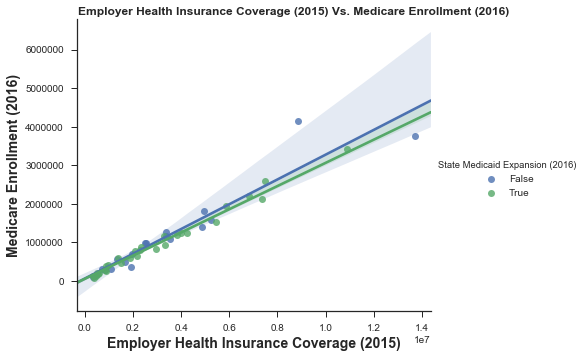

In [260]:

sns.set(style="ticks")
sns_plot=sns.pairplot(merge_affordable_care_medicare, x_vars=["Employer Health Insurance Coverage (2015)"], y_vars=["Medicare Enrollment (2016)"],
             hue="State Medicaid Expansion (2016)", size=5, aspect=1.2, kind="reg")
sns.despine()
sns_plot.fig.suptitle('Employer Health Insurance Coverage (2015) Vs. Medicare Enrollment (2016)',fontweight='bold',fontsize=12)
plt.xlabel("Employer Health Insurance Coverage (2015)", fontweight='bold',fontsize=14)
plt.ylabel("Medicare Enrollment (2016)",  fontweight='bold',fontsize=14)

sns_plot.savefig("Employer Health Insurance Coverage(2015) vs. Medicare Enrollment (2016).png")  
plt.show()


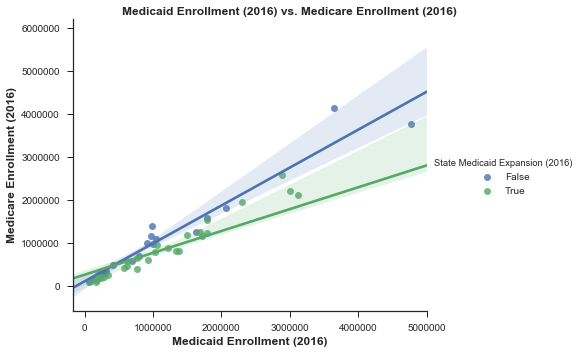

In [261]:
sns.set(style="ticks")
sns_plot=sns.pairplot(merge_affordable_care_medicare, x_vars=["Medicaid Enrollment (2016)"], y_vars=["Medicare Enrollment (2016)"],
             hue="State Medicaid Expansion (2016)", size=5, aspect=1.2, kind="reg")
sns.despine()
sns_plot.fig.suptitle('Medicaid Enrollment (2016) vs. Medicare Enrollment (2016)',  fontweight='bold',fontsize=12)
plt.xlabel("Medicaid Enrollment (2016)",  fontweight='bold',fontsize=12)
plt.ylabel("Medicare Enrollment (2016)",  fontweight='bold',fontsize=12)

sns_plot.savefig("Medicaid Enrollment (2016) vs. Medicare Enrollment (2016).png")  
plt.show()

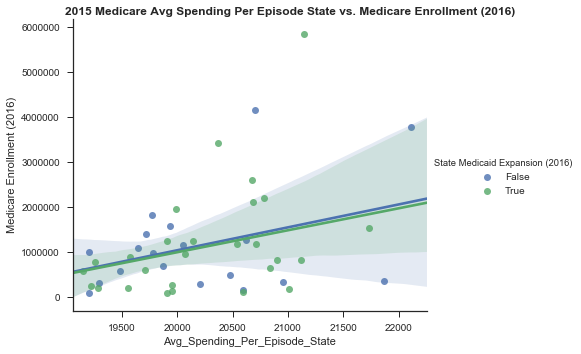

In [262]:
sns_plot = sns.pairplot(merge_affordable_care_medicare, x_vars=["Avg_Spending_Per_Episode_State"], y_vars=["Medicare Enrollment (2016)"],
             hue="State Medicaid Expansion (2016)", size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Medicare Avg Spending Per Episode State vs. Medicare Enrollment (2016)', fontweight='bold',fontsize=12)
sns_plot.savefig("Avg_Spending_Per_Episode_State_vs._Medicare_Enrollment_(2016).png") 
plt.show()

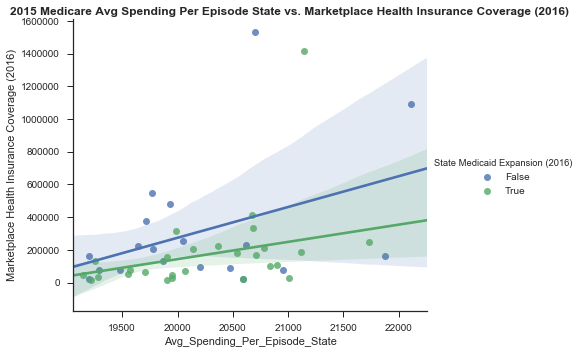

In [263]:
sns_plot=sns.pairplot(merge_affordable_care_medicare, x_vars=["Avg_Spending_Per_Episode_State"], y_vars=["Marketplace Health Insurance Coverage (2016)"],
             hue="State Medicaid Expansion (2016)", size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Medicare Avg Spending Per Episode State vs. Marketplace Health Insurance Coverage (2016)', fontweight='bold',fontsize=12)
sns_plot.savefig("Avg_Spending_Per_Episode_State_vs._Marketplace Health Insurance Coverage (2016).png") 
plt.show()

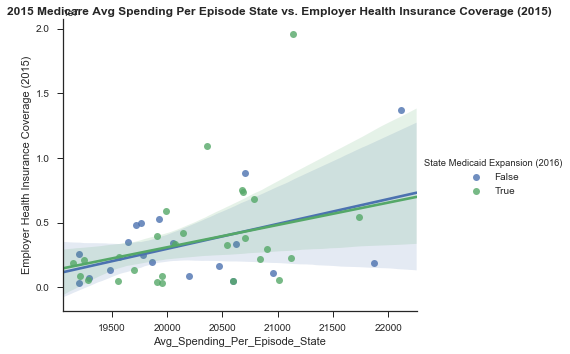

In [264]:
sns_plot=sns.pairplot(merge_affordable_care_medicare, x_vars=["Avg_Spending_Per_Episode_State"], y_vars=["Employer Health Insurance Coverage (2015)"],
             hue="State Medicaid Expansion (2016)", size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Medicare Avg Spending Per Episode State vs. Employer Health Insurance Coverage (2015)', fontweight='bold',fontsize=12)
sns_plot.savefig("Avg_Spending_Per_Episode_State_vs._Employer Health Insurance Coverage (2015).png") 
plt.show()

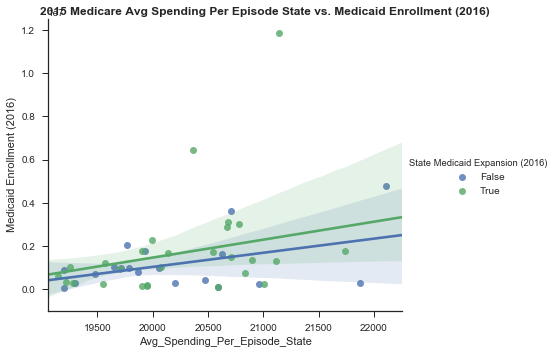

In [265]:
sns_plot=sns.pairplot(merge_affordable_care_medicare, x_vars=["Avg_Spending_Per_Episode_State"], y_vars=["Medicaid Enrollment (2016)"],
             hue="State Medicaid Expansion (2016)", size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Medicare Avg Spending Per Episode State vs. Medicaid Enrollment (2016)', fontweight='bold',fontsize=12)
sns_plot.savefig("Avg_Spending_Per_Episode_State_vs._Medicaid Enrollment (2016).png") 
plt.show()

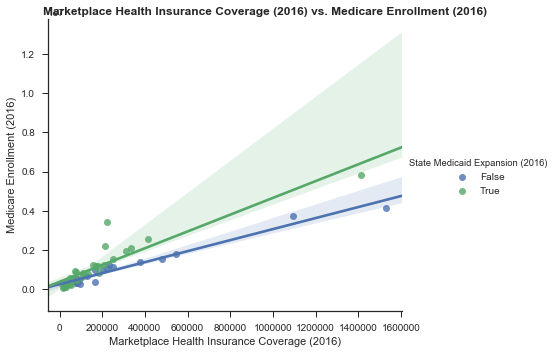

In [266]:
sns_plot=sns.pairplot(merge_affordable_care_medicare, x_vars=["Marketplace Health Insurance Coverage (2016)"], y_vars=["Medicare Enrollment (2016)"],
               hue="State Medicaid Expansion (2016)",size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('Marketplace Health Insurance Coverage (2016) vs. Medicare Enrollment (2016)', fontweight='bold',fontsize=12)
sns_plot.savefig("Medicare Enrollment (2016) vs. Marketplace Health Insurance Coverage (2016).png") 
plt.show()

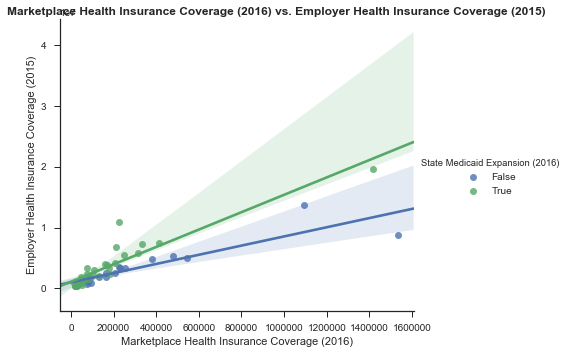

In [267]:

sns_plot=sns.pairplot(merge_affordable_care_medicare, x_vars=["Marketplace Health Insurance Coverage (2016)"], y_vars=["Employer Health Insurance Coverage (2015)"],
               hue="State Medicaid Expansion (2016)",size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('Marketplace Health Insurance Coverage (2016) vs. Employer Health Insurance Coverage (2015)', fontweight='bold',fontsize=12)
sns_plot.savefig("Employer Health Insurance Coverage (2015) vs. Marketplace Health Insurance Coverage (2016).png") 
plt.show()

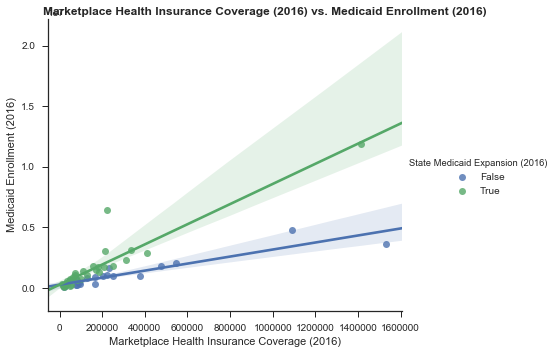

In [268]:
sns_plot=sns.pairplot(merge_affordable_care_medicare, x_vars=["Marketplace Health Insurance Coverage (2016)"], y_vars=["Medicaid Enrollment (2016)"],
               hue="State Medicaid Expansion (2016)", size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('Marketplace Health Insurance Coverage (2016) vs. Medicaid Enrollment (2016)', fontweight='bold',fontsize=12)
sns_plot.savefig("Medicaid Enrollment (2016) vs. Marketplace Health Insurance Coverage (2016).png") 
plt.show()

In [269]:
death_causes = "NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv"

death_causes_df = pd.read_csv(death_causes)
death_causes_df

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3%
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39%
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5%
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3%
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8%
5,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Nonmetropolitan,200.0,768506.0,103.0,97.0,48.5%
6,2005,Cancer,Alabama,AL,4,0-49,Floating,All,756.0,3148377.0,451.0,305.0,40.3%
7,2005,Cancer,Alabama,AL,4,0-49,Floating,Metropolitan,556.0,2379871.0,341.0,217.0,39%
8,2005,Cancer,Alabama,AL,4,0-49,Floating,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5%
9,2005,Cancer,Alabama,AL,4,0-54,2005 Fixed,All,1346.0,3463216.0,784.0,562.0,41.8%


In [270]:
death_causes_df=death_causes_df.query('Year >= 2010')
#death_causes_df= death_causes_df.dropna(how='any')
death_causes_df = death_causes_df.loc[death_causes_df["Benchmark"] == "2010 Fixed", :]
death_causes_df = death_causes_df.loc[death_causes_df["Locality"] == "All", :]
death_causes_df = death_causes_df.reset_index()
death_causes_df.head()


,index,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,92578,2010,Cancer,Florida,FL,4,0-69,2010 Fixed,All,16866.0,16500941.0,12592.0,4274.0,25.3%
1,93620,2010,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,632.0,3186426.0,412.0,220.0,34.8%
2,93629,2010,Cancer,Alabama,AL,4,0-54,2010 Fixed,All,1291.0,3533911.0,790.0,501.0,38.8%
3,93638,2010,Cancer,Alabama,AL,4,0-59,2010 Fixed,All,2195.0,3845817.0,1340.0,855.0,39%
4,93647,2010,Cancer,Alabama,AL,4,0-64,2010 Fixed,All,3412.0,4121944.0,2151.0,1261.0,37%


In [271]:

death_causes_df.drop('index', axis=1, inplace=True)
death_causes_df = death_causes_df.dropna(how='any')
death_causes_df.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2010,Cancer,Florida,FL,4,0-69,2010 Fixed,All,16866.0,16500941.0,12592.0,4274.0,25.3%
1,2010,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,632.0,3186426.0,412.0,220.0,34.8%
2,2010,Cancer,Alabama,AL,4,0-54,2010 Fixed,All,1291.0,3533911.0,790.0,501.0,38.8%
3,2010,Cancer,Alabama,AL,4,0-59,2010 Fixed,All,2195.0,3845817.0,1340.0,855.0,39%
4,2010,Cancer,Alabama,AL,4,0-64,2010 Fixed,All,3412.0,4121944.0,2151.0,1261.0,37%


In [272]:
death_causes_df["Percent Potentially Excess Deaths"] = death_causes_df["Percent Potentially Excess Deaths"] .replace('[%\,]', '', regex=True).astype(float)
death_causes_df

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2010,Cancer,Florida,FL,4,0-69,2010 Fixed,All,16866.0,16500941.0,12592.0,4274.0,25.3
1,2010,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,632.0,3186426.0,412.0,220.0,34.8
2,2010,Cancer,Alabama,AL,4,0-54,2010 Fixed,All,1291.0,3533911.0,790.0,501.0,38.8
3,2010,Cancer,Alabama,AL,4,0-59,2010 Fixed,All,2195.0,3845817.0,1340.0,855.0,39.0
4,2010,Cancer,Alabama,AL,4,0-64,2010 Fixed,All,3412.0,4121944.0,2151.0,1261.0,37.0
5,2010,Cancer,Alabama,AL,4,0-69,2010 Fixed,All,4743.0,4331581.0,3054.0,1690.0,35.6
6,2010,Cancer,Alabama,AL,4,0-74,2010 Fixed,All,6182.0,4492445.0,4109.0,2073.0,33.5
7,2010,Cancer,Alabama,AL,4,0-79,2010 Fixed,All,7595.0,4615281.0,5227.0,2369.0,31.2
8,2010,Cancer,Alabama,AL,4,0-84,2010 Fixed,All,8879.0,4704052.0,6279.0,2600.0,29.3
9,2010,Cancer,Alaska,AK,10,0-49,2010 Fixed,All,87.0,513084.0,64.0,23.0,26.4


In [273]:
grouped_death_causes_df= death_causes_df. groupby(['State FIPS Code', 'Year', 'Cause of Death'])
print(grouped_death_causes_df)

# In order to be visualized, a data function must be used...
grouped_death_causes_df=grouped_death_causes_df.mean()
grouped_death_causes_df

HHS Region  \
State FIPS Code Year Cause of Death                                  
0               2010 Cancer                                      0   
                     Chronic Lower Respiratory Disease           0   
                     Heart Disease                               0   
                     Stroke                                      0   
                     Unintentional Injury                        0   
                2011 Cancer                                      0   
                     Chronic Lower Respiratory Disease           0   
                     Heart Disease                               0   
                     Stroke                                      0   
                     Unintentional Injury                        0   
                2012 Cancer                                      0   
                     Chronic Lower Respiratory Disease           0   
                     Heart Disease                               0   
                     Stroke                                      0   
                     Unintentional Injury                        0   
                2013 Cancer                                      0   
                     Chronic Lower Respiratory Disease           0   
                     Heart Disease                               0   
                     Stroke                                      0   
                     Unintentional Injury                        0   
                2014 Cancer                                      0   
                     Chronic Lower Respiratory Disease           0   
                     Heart Disease                               0   
                     Stroke                                      0   
                     Unintentional Injury                        0   
                2015 Cancer                                      0   
                     Chronic Lower Respiratory Disease           0   
                     Heart Disease                               0   
                     Stroke                                      0   
                     Unintentional Injury                        0   
...                                                            ...   
WY              2010 Cancer                                      8   
                     Chronic Lower Respiratory Disease           8   
                     Heart Disease                               8   
                     Stroke                                      8   
                     Unintentional Injury                        8   
                2011 Cancer                                      8   
                     Chronic Lower Respiratory Disease           8   
                     Heart Disease                               8   
                     Stroke                                      8   
                     Unintentional Injury                        8   
                2012 Cancer                                      8   
                     Chronic Lower Respiratory Disease           8   
                     Heart Disease                               8   
                     Stroke                                      8   
                     Unintentional Injury                        8   
                2013 Cancer                                      8   
                     Chronic Lower Respiratory Disease           8   
                     Heart Disease                               8   
                     Stroke                                      8   
                     Unintentional Injury                        8   
                2014 Cancer                                      8   
                     Chronic Lower Respiratory Disease           8   
                     Heart Disease                               8   
                     Stroke                                      8   
                     Unintentional Injury                        8

In [274]:
grouped_death_causes_df = grouped_death_causes_df.reset_index()
grouped_death_causes_df.head()


,State FIPS Code,Year,Cause of Death,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,0,2010,Cancer,0,231247.375,266711674.0,180338.875,51056.625,23.1750
1,0,2010,Chronic Lower Respiratory Disease,0,37473.750,266711674.0,22184.125,15348.750,41.3750
2,0,2010,Heart Disease,0,161289.250,266711674.0,105009.250,56581.250,36.5125
3,0,2010,Stroke,0,29790.375,266711674.0,19334.125,10500.625,37.9000
4,0,2010,Unintentional Injury,0,80648.375,266711674.0,48166.625,32641.375,40.6000


In [275]:
grouped_USA_death_causes_df=grouped_death_causes_df.loc[grouped_death_causes_df["State FIPS Code"] == "0", :]
grouped_USA_death_causes_df.head()

,State FIPS Code,Year,Cause of Death,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,0,2010,Cancer,0,231247.375,266711674.0,180338.875,51056.625,23.1750
1,0,2010,Chronic Lower Respiratory Disease,0,37473.750,266711674.0,22184.125,15348.750,41.3750
2,0,2010,Heart Disease,0,161289.250,266711674.0,105009.250,56581.250,36.5125
3,0,2010,Stroke,0,29790.375,266711674.0,19334.125,10500.625,37.9000
4,0,2010,Unintentional Injury,0,80648.375,266711674.0,48166.625,32641.375,40.6000


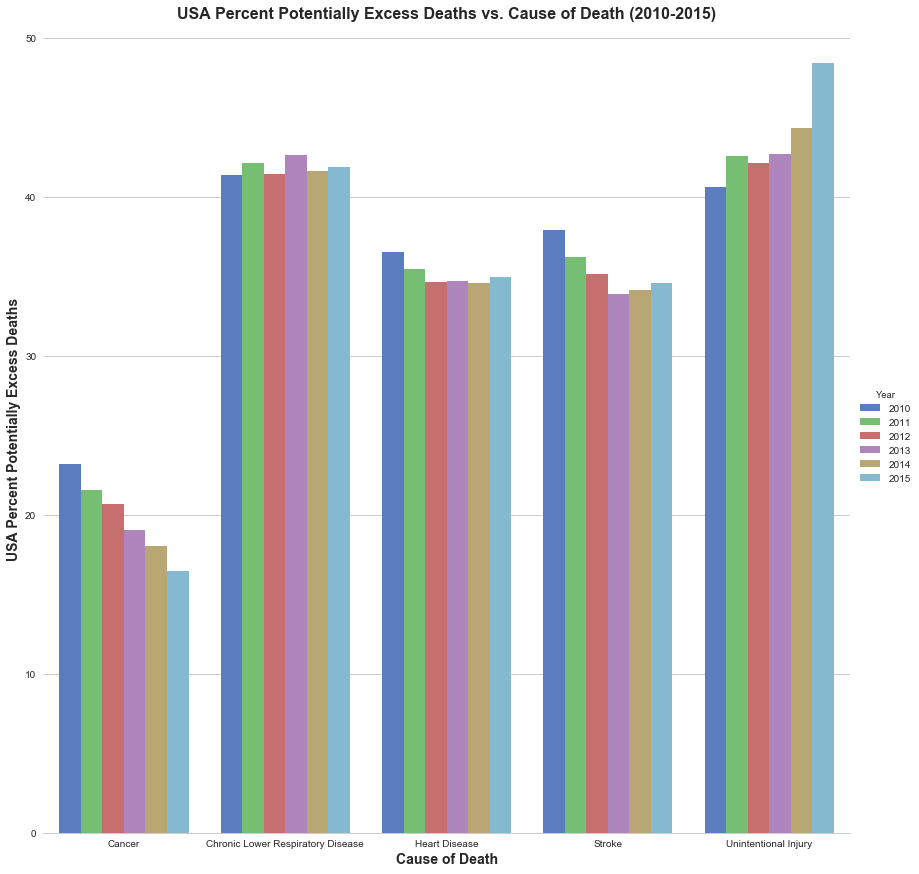

In [276]:
sns.set(style="whitegrid")
g = sns.factorplot(x="Cause of Death", y="Percent Potentially Excess Deaths", hue="Year", data=grouped_USA_death_causes_df,
                   size=12, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("USA Percent Potentially Excess Deaths",  fontweight='bold',fontsize=14)
g.set_xlabels("Cause of Death",  fontweight='bold',fontsize=14)
plt.title("USA Percent Potentially Excess Deaths vs. Cause of Death (2010-2015)", fontweight='bold',fontsize=16)
plt.savefig("USA Percent Potentially Excess Deaths caused by five leading disease (2010-2015)")    
plt.show()

In [277]:
grouped_state_death_causes_df=grouped_death_causes_df.loc[grouped_death_causes_df["State FIPS Code"] != "0", :]
grouped_state_death_causes_df.head()

,State FIPS Code,Year,Cause of Death,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
30,AK,2010,Cancer,10,418.250000,641288.625000,363.750000,59.125,14.212500
31,AK,2010,Chronic Lower Respiratory Disease,10,64.285714,659603.571429,45.571429,20.000,22.785714
32,AK,2010,Heart Disease,10,312.375000,641288.625000,207.375000,105.875,37.625000
33,AK,2010,Stroke,10,54.000000,641288.625000,36.500000,17.500,32.962500
34,AK,2010,Unintentional Injury,10,289.625000,641288.625000,112.500000,177.125,61.150000


In [278]:

state_cancer_death=grouped_state_death_causes_df.loc[grouped_state_death_causes_df["Cause of Death"] == "Cancer", :]
state_cancer_death.head()

,State FIPS Code,Year,Cause of Death,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
30,AK,2010,Cancer,10,418.250,641288.625,363.750,59.125,14.2125
35,AK,2011,Cancer,10,446.750,649941.375,377.500,71.000,15.9125
40,AK,2012,Cancer,10,435.875,655534.125,387.125,48.750,9.8375
45,AK,2013,Cancer,10,492.875,657146.000,390.250,103.125,20.2000
50,AK,2014,Cancer,10,459.875,656759.625,395.375,69.625,15.7125


In [279]:
state_cancer_death_2010= state_cancer_death.query('Year == 2010')
state_cancer_death_2010=state_cancer_death_2010[['State FIPS Code', 'Percent Potentially Excess Deaths']]
state_cancer_death_2010=state_cancer_death_2010.rename(columns={"Percent Potentially Excess Deaths":"2010 cancer caused Percent Potentially Excess Deaths"})
state_cancer_death_2010.head()


,State FIPS Code,2010 cancer caused Percent Potentially Excess Deaths
30,AK,14.2125
60,AL,34.9000
90,AR,36.8125
120,AZ,11.6000
150,CA,11.2375


In [280]:
state_cancer_death_2015= state_cancer_death.query('Year == 2015')
state_cancer_death_2015=state_cancer_death_2015[['State FIPS Code', 'Percent Potentially Excess Deaths']]
state_cancer_death_2015=state_cancer_death_2015.rename(columns={"Percent Potentially Excess Deaths":"2015 cancer caused Percent Potentially Excess Deaths"})
state_cancer_death_2015.head()

,State FIPS Code,2015 cancer caused Percent Potentially Excess Deaths
55,AK,13.1750
85,AL,29.9625
115,AR,33.8250
145,AZ,7.3375
175,CA,3.8750


In [281]:
merge_state_cancer_death = pd.merge(state_cancer_death_2010, state_cancer_death_2015, on="State FIPS Code")
merge_state_cancer_death = merge_state_cancer_death.rename(columns={"State FIPS Code":"State Abbreviation"})
merge_state_cancer_death.head()

,State Abbreviation,2010 cancer caused Percent Potentially Excess Deaths,2015 cancer caused Percent Potentially Excess Deaths
0,AK,14.2125,13.1750
1,AL,34.9000,29.9625
2,AR,36.8125,33.8250
3,AZ,11.6000,7.3375
4,CA,11.2375,3.8750


In [282]:
merge_state_cancer_death["Cancer Caused Percent Potentially Excess Deaths Change(2010-2015)"]= merge_state_cancer_death["2015 cancer caused Percent Potentially Excess Deaths"]-merge_state_cancer_death["2010 cancer caused Percent Potentially Excess Deaths"]
merge_state_cancer_death.head()

,State Abbreviation,2010 cancer caused Percent Potentially Excess Deaths,2015 cancer caused Percent Potentially Excess Deaths,Cancer Caused Percent Potentially Excess Deaths Change(2010-2015)
0,AK,14.2125,13.1750,-1.0375
1,AL,34.9000,29.9625,-4.9375
2,AR,36.8125,33.8250,-2.9875
3,AZ,11.6000,7.3375,-4.2625
4,CA,11.2375,3.8750,-7.3625


In [283]:
 merge_state_cancer_death.count()

State Abbreviation                                                   51
2010 cancer caused Percent Potentially Excess Deaths                 51
2015 cancer caused Percent Potentially Excess Deaths                 51
Cancer Caused Percent Potentially Excess Deaths Change(2010-2015)    51
dtype: int64

In [284]:
merge_all = pd.merge(merge_affordable_care_medicare,  merge_state_cancer_death, how='left', on="State Abbreviation")
merge_all.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016),Avg_Spending_Per_Episode_State,2010 cancer caused Percent Potentially Excess Deaths,2015 cancer caused Percent Potentially Excess Deaths,Cancer Caused Percent Potentially Excess Deaths Change(2010-2015)
0,Alabama,AL,14.6,10.1,-4.5,989855,2545000,165534,310.0,910775,False,19201.0,34.9000,29.9625,-4.9375
1,Alaska,AK,19.9,14.9,-5.0,88966,390000,17995,750.0,166625,True,19907.0,14.2125,13.1750,-1.0375
2,Arizona,AZ,16.9,10.8,-6.1,1175624,3288000,179445,230.0,1716198,True,20542.0,11.6000,7.3375,-4.2625
3,Arkansas,AR,17.5,9.5,-8.0,606146,1365000,63357,306.0,920194,True,19705.0,36.8125,33.8250,-2.9875
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,True,21141.0,11.2375,3.8750,-7.3625


In [285]:
#merge_all["Uninsured Rate Change (2010-2015)"] = merge_all["Uninsured Rate Change (2010-2015)"].abs()
#merge_all.head()

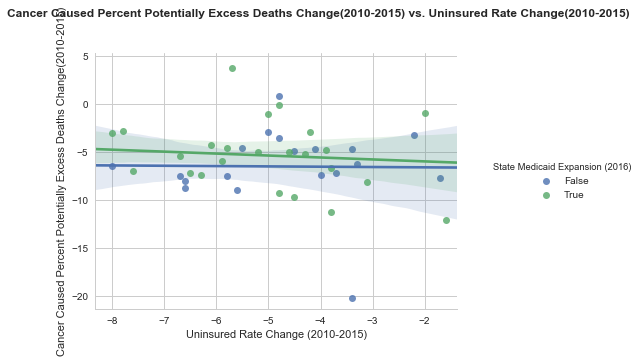

In [286]:
sns_plot = sns.pairplot(merge_all, x_vars=["Uninsured Rate Change (2010-2015)"], y_vars=["Cancer Caused Percent Potentially Excess Deaths Change(2010-2015)"],
             hue="State Medicaid Expansion (2016)",size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('Cancer Caused Percent Potentially Excess Deaths Change(2010-2015) vs. Uninsured Rate Change(2010-2015) ',fontweight='bold',fontsize=12)
sns_plot.savefig("Cancer_Caused_Percent_Potentially_Excess_Deaths_Change_vs._Uninsured_Rate_Change.png") 
plt.show()

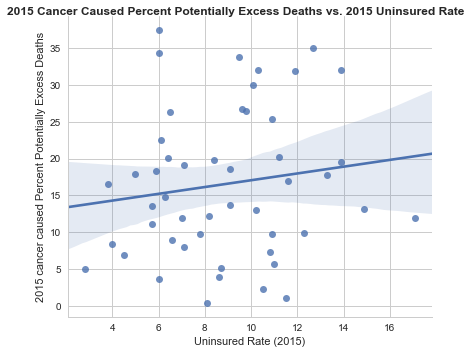

In [287]:
sns_plot = sns.pairplot(merge_all, x_vars=["Uninsured Rate (2015)"], y_vars=["2015 cancer caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Cancer Caused Percent Potentially Excess Deaths vs. 2015 Uninsured Rate',fontweight='bold',fontsize=12)
sns_plot.savefig("2015_Cancer_Caused_Percent_Potentially_Excess_Deaths_vs._Uninsured_Rate_2015.png") 
plt.show()

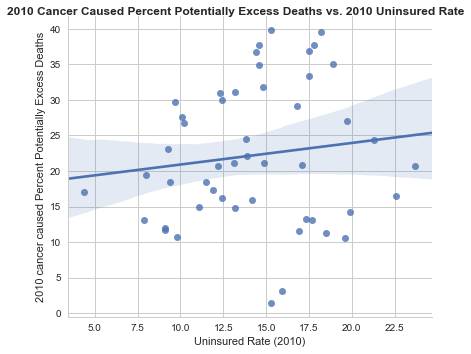

In [288]:
sns_plot= sns.pairplot(merge_all, x_vars=["Uninsured Rate (2010)"], y_vars=["2010 cancer caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2010 Cancer Caused Percent Potentially Excess Deaths vs. 2010 Uninsured Rate',fontweight='bold',fontsize=12)
sns_plot.savefig("2010_Cancer_Caused_Percent_Potentially_Excess_Deaths_vs._Uninsured_Rate-2010.png") 
plt.show()

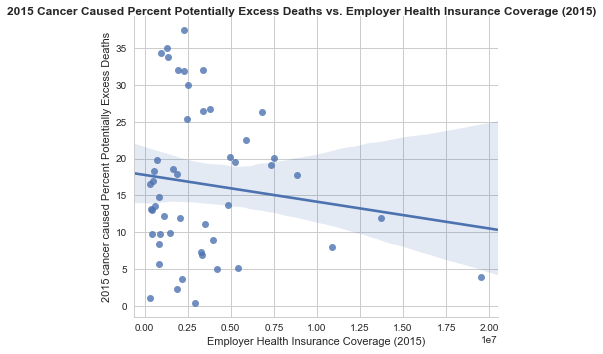

In [289]:
sns_plot= sns.pairplot(merge_all, x_vars=["Employer Health Insurance Coverage (2015)"], y_vars=["2015 cancer caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Cancer Caused Percent Potentially Excess Deaths vs. Employer Health Insurance Coverage (2015)',fontweight='bold',fontsize=12)
sns_plot.savefig("2015_Cancer_Caused_Percent_Potentially_Excess_Deaths_vs._Employer Health Insurance Coverage (2015).png") 
plt.show()

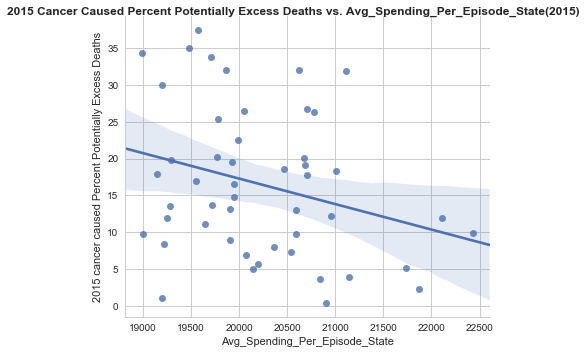

In [290]:
sns_plot= sns.pairplot(merge_all, x_vars=["Avg_Spending_Per_Episode_State"], y_vars=["2015 cancer caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Cancer Caused Percent Potentially Excess Deaths vs. Avg_Spending_Per_Episode_State(2015)',fontweight='bold',fontsize=12)
sns_plot.savefig("2015_Cancer_Caused_Percent_Potentially_Excess_Deaths_vs._Avg_Spending_Per_Episode_State (2015).png") 
plt.show()

In [291]:
state_stroke_death=grouped_state_death_causes_df.loc[grouped_state_death_causes_df["Cause of Death"] == "Stroke", :]
state_stroke_death.head()

,State FIPS Code,Year,Cause of Death,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
33,AK,2010,Stroke,10,54.000000,641288.625000,36.500000,17.500000,32.962500
38,AK,2011,Stroke,10,57.857143,668964.571429,42.285714,15.571429,24.414286
43,AK,2012,Stroke,10,56.125000,655534.125000,39.250000,17.000000,33.200000
48,AK,2013,Stroke,10,55.875000,657146.000000,39.875000,16.000000,28.062500
53,AK,2014,Stroke,10,51.125000,656759.625000,40.500000,11.000000,23.425000


In [292]:
state_stroke_death_2010= state_stroke_death.query('Year == 2010')
state_stroke_death_2010=state_stroke_death_2010[['State FIPS Code', 'Percent Potentially Excess Deaths']]
state_stroke_death_2010=state_stroke_death_2010.rename(columns={"Percent Potentially Excess Deaths":"2010 stroke caused Percent Potentially Excess Deaths"})
state_stroke_death_2010.head()

,State FIPS Code,2010 stroke caused Percent Potentially Excess Deaths
33,AK,32.9625
63,AL,61.3500
93,AR,54.1000
123,AZ,13.9500
153,CA,33.9125


In [293]:
state_stroke_death_2015= state_stroke_death.query('Year == 2015')
state_stroke_death_2015=state_stroke_death_2015[['State FIPS Code', 'Percent Potentially Excess Deaths']]
state_stroke_death_2015=state_stroke_death_2015.rename(columns={"Percent Potentially Excess Deaths":"2015 stroke caused Percent Potentially Excess Deaths"})
state_stroke_death_2015.head()

,State FIPS Code,2015 stroke caused Percent Potentially Excess Deaths
58,AK,38.0625
88,AL,61.2250
118,AR,56.5375
148,AZ,19.5750
178,CA,26.7250


In [294]:
merge_state_stroke_death = pd.merge(state_stroke_death_2010, state_stroke_death_2015, on="State FIPS Code")
merge_state_stroke_death = merge_state_stroke_death.rename(columns={"State FIPS Code":"State Abbreviation"})
merge_state_stroke_death.head()

,State Abbreviation,2010 stroke caused Percent Potentially Excess Deaths,2015 stroke caused Percent Potentially Excess Deaths
0,AK,32.9625,38.0625
1,AL,61.3500,61.2250
2,AR,54.1000,56.5375
3,AZ,13.9500,19.5750
4,CA,33.9125,26.7250


In [295]:
merge_state_stroke_death["Stroke Caused Percent Potentially Excess Deaths Change(2010-2015)"]= merge_state_stroke_death["2015 stroke caused Percent Potentially Excess Deaths"]-merge_state_stroke_death["2010 stroke caused Percent Potentially Excess Deaths"]
merge_state_stroke_death.head()

,State Abbreviation,2010 stroke caused Percent Potentially Excess Deaths,2015 stroke caused Percent Potentially Excess Deaths,Stroke Caused Percent Potentially Excess Deaths Change(2010-2015)
0,AK,32.9625,38.0625,5.1000
1,AL,61.3500,61.2250,-0.1250
2,AR,54.1000,56.5375,2.4375
3,AZ,13.9500,19.5750,5.6250
4,CA,33.9125,26.7250,-7.1875


In [296]:
merge_all_stroke = pd.merge(merge_all,  merge_state_stroke_death, how='left', on="State Abbreviation")
merge_all_stroke.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),State Medicaid Expansion (2016),Avg_Spending_Per_Episode_State,2010 cancer caused Percent Potentially Excess Deaths,2015 cancer caused Percent Potentially Excess Deaths,Cancer Caused Percent Potentially Excess Deaths Change(2010-2015),2010 stroke caused Percent Potentially Excess Deaths,2015 stroke caused Percent Potentially Excess Deaths,Stroke Caused Percent Potentially Excess Deaths Change(2010-2015)
0,Alabama,AL,14.6,10.1,-4.5,989855,2545000,165534,310.0,910775,False,19201.0,34.9000,29.9625,-4.9375,61.3500,61.2250,-0.1250
1,Alaska,AK,19.9,14.9,-5.0,88966,390000,17995,750.0,166625,True,19907.0,14.2125,13.1750,-1.0375,32.9625,38.0625,5.1000
2,Arizona,AZ,16.9,10.8,-6.1,1175624,3288000,179445,230.0,1716198,True,20542.0,11.6000,7.3375,-4.2625,13.9500,19.5750,5.6250
3,Arkansas,AR,17.5,9.5,-8.0,606146,1365000,63357,306.0,920194,True,19705.0,36.8125,33.8250,-2.9875,54.1000,56.5375,2.4375
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,True,21141.0,11.2375,3.8750,-7.3625,33.9125,26.7250,-7.1875


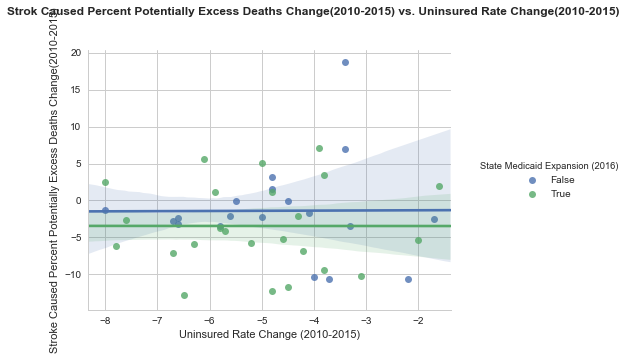

In [297]:
sns_plot=sns.pairplot(merge_all_stroke, x_vars=["Uninsured Rate Change (2010-2015)"], y_vars=["Stroke Caused Percent Potentially Excess Deaths Change(2010-2015)"],
             hue="State Medicaid Expansion (2016)",size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('Strok Caused Percent Potentially Excess Deaths Change(2010-2015) vs. Uninsured Rate Change(2010-2015)',fontweight='bold',fontsize=12)
sns_plot.savefig("Stroke_Caused_Percent_Potentially_Excess_Deaths_Change_vs._Uninsured_Rate_Change.png") 
plt.show()

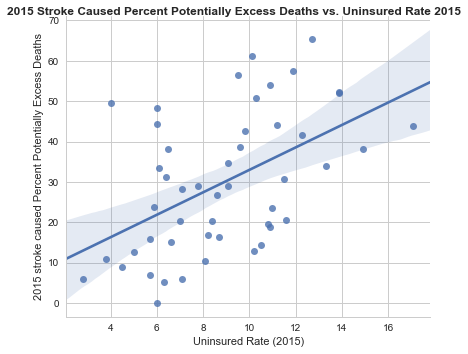

In [298]:
sns_plot=sns.pairplot(merge_all_stroke, x_vars=["Uninsured Rate (2015)"], y_vars=["2015 stroke caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Stroke Caused Percent Potentially Excess Deaths vs. Uninsured Rate 2015',fontweight='bold',fontsize=12)
sns_plot.savefig("2015_Stroke_Caused_Percent_Potentially_Excess_Deaths_vs._Uninsured_Rate_2015.png") 
plt.show()

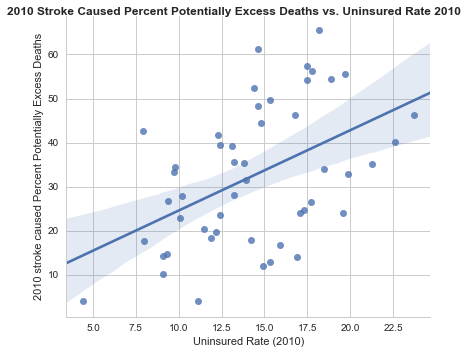

In [210]:
sns_plot=sns.pairplot(merge_all_stroke, x_vars=["Uninsured Rate (2010)"], y_vars=["2010 stroke caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2010 Stroke Caused Percent Potentially Excess Deaths vs. Uninsured Rate 2010',fontweight='bold',fontsize=12)
sns_plot.savefig("2010_Stroke_Caused_Percent_Potentially_Excess_Deaths_vs._Uninsured_Rate_2010.png") 
plt.show()

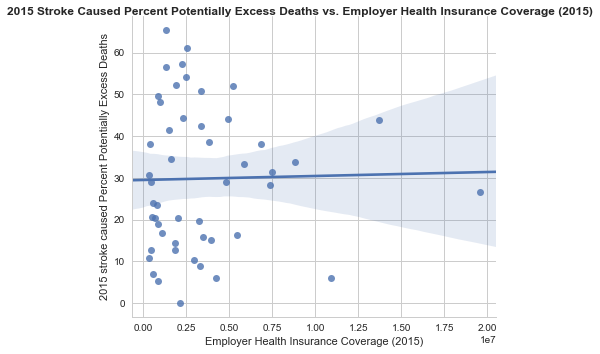

In [211]:
sns_plot=sns.pairplot(merge_all_stroke, x_vars=["Employer Health Insurance Coverage (2015)"], y_vars=["2015 stroke caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Stroke Caused Percent Potentially Excess Deaths vs. Employer Health Insurance Coverage (2015)',fontweight='bold',fontsize=12)
sns_plot.savefig("2015_Stroke_Caused_Percent_Potentially_Excess_Deaths_vs._Employer Health Insurance Coverage (2015).png") 
plt.show()

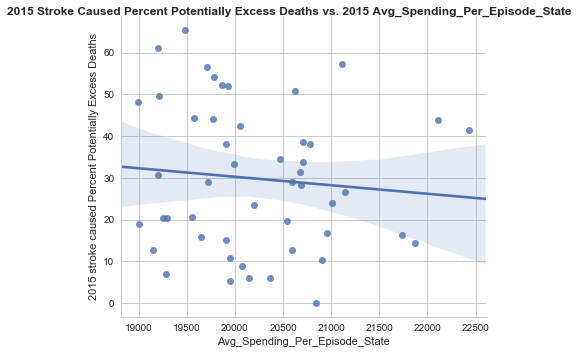

In [212]:
sns_plot=sns.pairplot(merge_all_stroke, x_vars=["Avg_Spending_Per_Episode_State"], y_vars=["2015 stroke caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Stroke Caused Percent Potentially Excess Deaths vs. 2015 Avg_Spending_Per_Episode_State',fontweight='bold',fontsize=12)
sns_plot.savefig("2015_Stroke_Caused_Percent_Potentially_Excess_Deaths_vs._Avg_Spending_Per_Episode_State 2015.png") 
plt.show()

In [213]:
state_Unintentional_Injury_death=grouped_state_death_causes_df.loc[grouped_state_death_causes_df["Cause of Death"] == "Unintentional Injury", :]
state_Unintentional_Injury_death.head()

,State FIPS Code,Year,Cause of Death,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
34,AK,2010,Unintentional Injury,10,289.625,641288.625,112.500,177.125,61.1500
39,AK,2011,Unintentional Injury,10,318.250,649941.375,114.125,204.125,64.2625
44,AK,2012,Unintentional Injury,10,298.250,655534.125,115.500,182.750,61.4000
49,AK,2013,Unintentional Injury,10,291.500,657146.000,115.375,176.125,60.6000
54,AK,2014,Unintentional Injury,10,300.125,656759.625,115.750,184.375,61.3875


In [214]:
state_Injury_death_2010 = state_Unintentional_Injury_death.query('Year == 2010')
state_Injury_death_2010 = state_Injury_death_2010[['State FIPS Code', 'Percent Potentially Excess Deaths']]
state_Injury_death_2010 = state_Injury_death_2010.rename(columns={"Percent Potentially Excess Deaths":"2010 Injury caused Percent Potentially Excess Deaths"})
state_Injury_death_2010.head()


,State FIPS Code,2010 Injury caused Percent Potentially Excess Deaths
34,AK,61.1500
64,AL,58.0250
94,AR,57.2500
124,AZ,50.5875
154,CA,20.0375


In [215]:
state_Injury_death_2015 = state_Unintentional_Injury_death.query('Year == 2015')
state_Injury_death_2015 = state_Injury_death_2015[['State FIPS Code', 'Percent Potentially Excess Deaths']]
state_Injury_death_2015 = state_Injury_death_2015.rename(columns={"Percent Potentially Excess Deaths":"2015 Injury caused Percent Potentially Excess Deaths"})
state_Injury_death_2015.head()

,State FIPS Code,2015 Injury caused Percent Potentially Excess Deaths
59,AK,60.9750
89,AL,59.5125
119,AR,56.6000
149,AZ,53.3750
179,CA,28.5500


In [216]:
merge_state_Injury_death = pd.merge(state_Injury_death_2010, state_Injury_death_2015, on="State FIPS Code")
merge_state_Injury_death = merge_state_Injury_death.rename(columns={"State FIPS Code":"State Abbreviation"})
merge_state_Injury_death.head()

,State Abbreviation,2010 Injury caused Percent Potentially Excess Deaths,2015 Injury caused Percent Potentially Excess Deaths
0,AK,61.1500,60.9750
1,AL,58.0250,59.5125
2,AR,57.2500,56.6000
3,AZ,50.5875,53.3750
4,CA,20.0375,28.5500


In [217]:
merge_state_Injury_death["Injury Caused Percent Potentially Excess Deaths Change(2010-2015)"]= merge_state_Injury_death["2015 Injury caused Percent Potentially Excess Deaths"]-merge_state_Injury_death["2010 Injury caused Percent Potentially Excess Deaths"]
merge_state_Injury_death.head()

,State Abbreviation,2010 Injury caused Percent Potentially Excess Deaths,2015 Injury caused Percent Potentially Excess Deaths,Injury Caused Percent Potentially Excess Deaths Change(2010-2015)
0,AK,61.1500,60.9750,-0.1750
1,AL,58.0250,59.5125,1.4875
2,AR,57.2500,56.6000,-0.6500
3,AZ,50.5875,53.3750,2.7875
4,CA,20.0375,28.5500,8.5125


In [218]:
merge_all_injury = pd.merge(merge_all_stroke,  merge_state_Injury_death, how='left', on="State Abbreviation")
merge_all_injury.head()

,State,State Abbreviation,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2016),...,Avg_Spending_Per_Episode_State,2010 cancer caused Percent Potentially Excess Deaths,2015 cancer caused Percent Potentially Excess Deaths,Cancer Caused Percent Potentially Excess Deaths Change(2010-2015),2010 stroke caused Percent Potentially Excess Deaths,2015 stroke caused Percent Potentially Excess Deaths,Stroke Caused Percent Potentially Excess Deaths Change(2010-2015),2010 Injury caused Percent Potentially Excess Deaths,2015 Injury caused Percent Potentially Excess Deaths,Injury Caused Percent Potentially Excess Deaths Change(2010-2015)
0,Alabama,AL,14.6,10.1,-4.5,989855,2545000,165534,310.0,910775,...,19201.0,34.9000,29.9625,-4.9375,61.3500,61.2250,-0.1250,58.0250,59.5125,1.4875
1,Alaska,AK,19.9,14.9,-5.0,88966,390000,17995,750.0,166625,...,19907.0,14.2125,13.1750,-1.0375,32.9625,38.0625,5.1000,61.1500,60.9750,-0.1750
2,Arizona,AZ,16.9,10.8,-6.1,1175624,3288000,179445,230.0,1716198,...,20542.0,11.6000,7.3375,-4.2625,13.9500,19.5750,5.6250,50.5875,53.3750,2.7875
3,Arkansas,AR,17.5,9.5,-8.0,606146,1365000,63357,306.0,920194,...,19705.0,36.8125,33.8250,-2.9875,54.1000,56.5375,2.4375,57.2500,56.6000,-0.6500
4,California,CA,18.5,8.6,-9.9,5829777,19552000,1415428,309.0,11843081,...,21141.0,11.2375,3.8750,-7.3625,33.9125,26.7250,-7.1875,20.0375,28.5500,8.5125


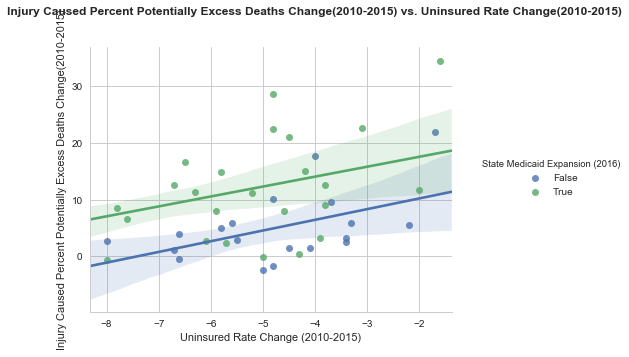

In [219]:
sns_plot=sns.pairplot(merge_all_injury, x_vars=["Uninsured Rate Change (2010-2015)"], y_vars=["Injury Caused Percent Potentially Excess Deaths Change(2010-2015)"],
             hue="State Medicaid Expansion (2016)",size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('Injury Caused Percent Potentially Excess Deaths Change(2010-2015) vs. Uninsured Rate Change(2010-2015)',fontweight='bold',fontsize=12)
sns_plot.savefig("Injury_Caused_Percent_Potentially_Excess_Deaths_Change_vs._Uninsured_Rate_Change.png") 
plt.show()

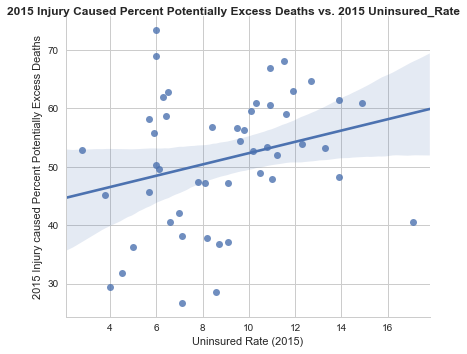

In [220]:
sns_plot=sns.pairplot(merge_all_injury, x_vars=["Uninsured Rate (2015)"], y_vars=["2015 Injury caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Injury Caused Percent Potentially Excess Deaths vs. 2015 Uninsured_Rate',fontweight='bold',fontsize=12)
sns_plot.savefig("2015_Injury_Caused_Percent_Potentially_Excess_Deaths_vs._2015_Uninsured_Rate.png") 
plt.show()

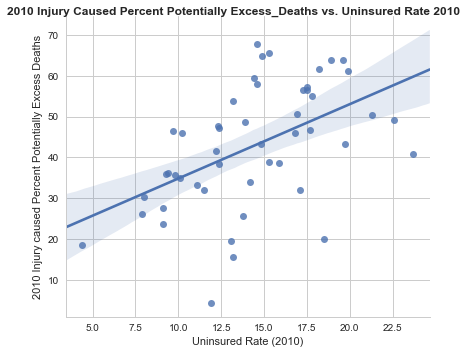

In [221]:
sns_plot=sns.pairplot(merge_all_injury, x_vars=["Uninsured Rate (2010)"], y_vars=["2010 Injury caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2010 Injury Caused Percent Potentially Excess_Deaths vs. Uninsured Rate 2010',fontweight='bold',fontsize=12)
sns_plot.savefig("2010_Injury_Caused_Percent_Potentially_Excess_Deaths_vs._Uninsured_Rate_2010.png") 
plt.show()

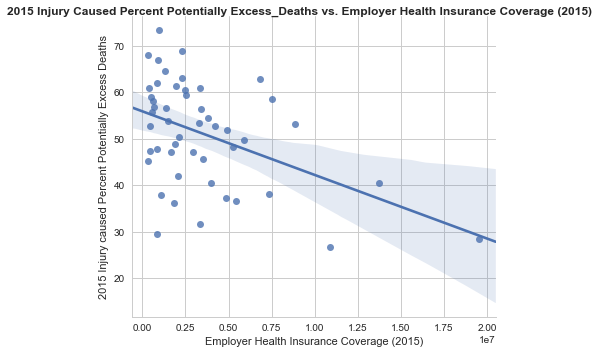

In [222]:
sns_plot=sns.pairplot(merge_all_injury, x_vars=["Employer Health Insurance Coverage (2015)"], y_vars=["2015 Injury caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Injury Caused Percent Potentially Excess_Deaths vs. Employer Health Insurance Coverage (2015)',fontweight='bold',fontsize=12)
sns_plot.savefig("2015_Injury_Caused_Percent_Potentially_Excess_Deaths vs.Employer Health Insurance Coverage (2015).png") 
plt.show()

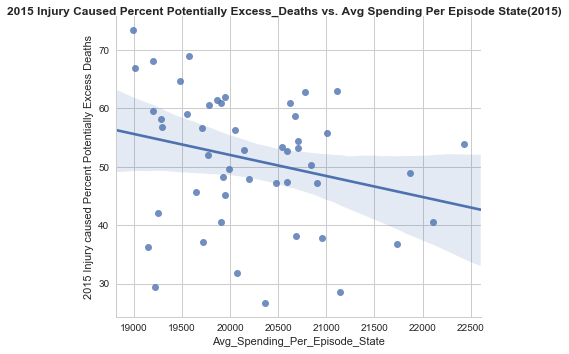

In [223]:
sns_plot=sns.pairplot(merge_all_injury, x_vars=["Avg_Spending_Per_Episode_State"], y_vars=["2015 Injury caused Percent Potentially Excess Deaths"],
             size=5, aspect=1.2, kind="reg")
sns_plot.fig.suptitle('2015 Injury Caused Percent Potentially Excess_Deaths vs. Avg Spending Per Episode State(2015)',fontweight='bold',fontsize=12)
sns_plot.savefig("2015_Injury_Caused_Percent_Potentially_Excess_Deaths vs.Avg Spending Per Episode State(2015).png") 
plt.show()

In [224]:
df = affordable_care_statename
for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(84,39,143)'],[0.2, 'rgb(117,107,177)'],[0.4, 'rgb(158,154,200)'],\
            [0.6, 'rgb(188,189,220)'],[0.8, 'rgb(218,218,235)'],[1.0, 'rgb(242,240,247)']]

df['text'] = df['State']  + '<br>' +\
    'Coverage Increase: '+df['Health Insurance Coverage Change (2010-2015)']+'<br>'+\
    'Medicaid Expansion: '+df['State Medicaid Expansion (2016)']+'<br>'+\
    'Avg. Tax Credit: ' + df['Average Monthly Tax Credit (2016)']+'<br>'+\
    'Medicaid Enrollment Change (2013-2016): '+df['Medicaid Enrollment Change (2013-2016)']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['Abbreviation'],
        z = df['Uninsured Rate Change (2010-2015)'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Percent of State Population")
        ) ]

layout = dict(
        title = 'Uninsure Rate Changes Between 2010 - 2015(%)<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )